<a href="https://colab.research.google.com/github/tensorbytes0202/Deep-learning/blob/main/Xavier_initialization_adi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/ushape.csv')

In [3]:
df.head()

,X,Y,Class
0,2.1200,-0.0462,1.0
1,0.8820,-0.0758,0.0
2,-0.0551,-0.0373,1.0
3,0.8300,-0.5390,1.0
4,2.1100,0.6620,1.0


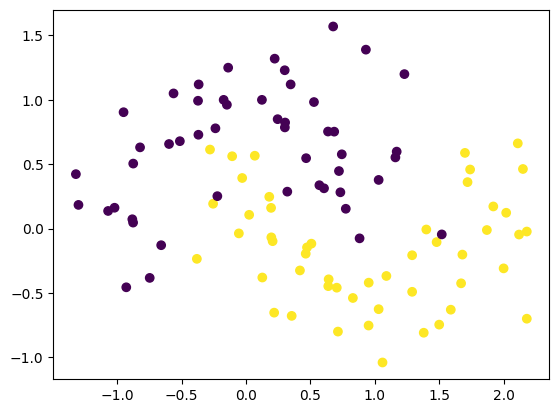

In [7]:
plt.scatter(df['X'],df['Y'],c=df['Class'])

In [8]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [10]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()

In [12]:
model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.get_weights()

[array([[-0.4762916 , -0.15077901, -0.49165797,  0.53582126,  0.01233417,
          0.28755814, -0.6623598 ,  0.15348232, -0.5598777 , -0.12216836],
        [-0.15316486,  0.14768004,  0.1270923 , -0.04613459,  0.6317355 ,
          0.35050923,  0.18825632,  0.53155845, -0.12981665, -0.07022238]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.24165076, -0.51007116,  0.34516782,  0.07493895,  0.28171885,
         -0.46188954,  0.1818921 ,  0.5037521 ,  0.10018677,  0.03132004],
        [-0.24758402,  0.34930664,  0.3976794 ,  0.19653368, -0.17219833,
         -0.30670843, -0.4678067 ,  0.11820614,  0.0996083 , -0.02800429],
        [-0.15352789,  0.38666868, -0.5418997 ,  0.30866814,  0.4671216 ,
         -0.11268348, -0.01767522,  0.31338638,  0.07207829,  0.49092913],
        [ 0.15184855,  0.00218248, -0.1158638 , -0.4904504 , -0.10711524,
          0.26430494,  0.39023775,  0.08111411,  0.37743956,  0.05322397],
        [ 0.16022

In [14]:
initial_weights = model.get_weights()

In [15]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [16]:
model.set_weights(initial_weights)

In [17]:
model.get_weights()

[array([[ 0.36676973, -1.0603408 , -0.46986687,  0.1671841 , -1.1042137 ,
          0.90066385, -0.20221233,  0.4871732 ,  0.39103493, -0.5335355 ],
        [ 0.58115685, -0.6155468 ,  0.6699345 , -0.17608508, -1.576516  ,
          1.21807   , -0.85667187, -1.38197   ,  0.23629625, -0.39357555]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.22684398,  0.06558814, -0.08368706, -0.2610957 ,  0.18103983,
          0.36785096,  0.37926584, -0.20547089, -0.1850188 , -0.46361855],
        [-0.2898722 ,  0.13800743, -0.39028922,  0.10867723,  0.01760681,
          0.08568755, -0.03536651, -0.50746083,  0.42368376,  0.37135497],
        [-0.5684452 , -0.22414643,  0.4364645 ,  0.3665706 , -0.15933126,
         -0.22703545,  0.0200251 ,  0.18183468,  0.02856304, -0.44721723],
        [ 0.43178397,  0.08056635,  0.626866  , -0.4189015 , -0.25132963,
          0.19137022,  0.02579998, -0.36004853, -0.29161438, -0.25633305],
        [ 0.03901

In [18]:
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])


In [19]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - accuracy: 0.4418 - loss: 0.7248 - val_accuracy: 0.3000 - val_loss: 0.7605
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4144 - loss: 0.7222 - val_accuracy: 0.3000 - val_loss: 0.7513
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4246 - loss: 0.7163 - val_accuracy: 0.3000 - val_loss: 0.7422
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4725 - loss: 0.7057 - val_accuracy: 0.3000 - val_loss: 0.7337
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4734 - loss: 0.7005 - val_accuracy: 0.3500 - val_loss: 0.7249
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6012 - loss: 0.6905 - val_accuracy: 0.4000 - val_loss: 0.7164
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5787 - loss: 0.6874 - val_accuracy: 0.4500 - val_loss: 0.7078
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5968 - loss: 0.6814 - val_accuracy: 0.5000 - val_loss

In [20]:
model.get_weights()

[array([[ 0.40909863, -1.1342689 , -0.503767  ,  0.2842793 , -1.0522747 ,
          0.8542669 , -0.15597011,  0.60546976,  0.46503812, -0.42290416],
        [ 0.52846813, -0.5696583 ,  0.76316994, -0.3111079 , -1.6012443 ,
          1.2675478 , -0.87856245, -1.4446725 ,  0.11763861, -0.35274902]],
       dtype=float32),
 array([ 0.00939611, -0.19293961,  0.07268488, -0.07001087,  0.2230121 ,
        -0.17756788, -0.0792887 , -0.0543534 , -0.01719148,  0.10056018],
       dtype=float32),
 array([[-0.27988344,  0.10154038, -0.21666244, -0.21170835,  0.24732985,
          0.407072  ,  0.18996112, -0.15630883, -0.15405391, -0.45989034],
        [-0.21079496,  0.04807959, -0.23183501,  0.06032965,  0.06140654,
         -0.01065826,  0.12268716, -0.6138634 ,  0.4871023 ,  0.41323227],
        [-0.5581391 , -0.32097563,  0.5512173 ,  0.42252448, -0.01158198,
         -0.36657318,  0.16503698,  0.03791957,  0.1928456 , -0.42079765],
        [ 0.43594652,  0.19446868,  0.48171812, -0.47823924, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

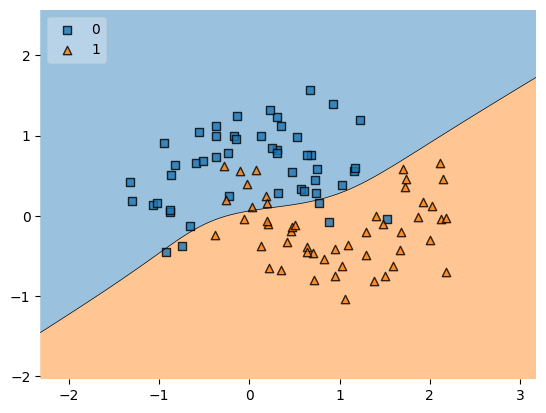

In [21]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [22]:
(np.random.randn(10,10)*0.01).min()

np.float64(-0.02035729689545283)

In [23]:
(np.random.randn(10,10)*0.01).max()

np.float64(0.022791493351782245)